In [1415]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import dtale
import sweetviz as sv

## This statement allows the visuals to render within your Jupyter Notebook.


## Step 1: Defining the Problem Statement
We are interested in understanding the employment landscape within Saudi
Arabia. We would like to know:
> * What proportion of job postings is attributed to each region within the
kingdom?
> * Is there a gender preference indicated in the job postings?
> * What is the expected salary range for fresh graduates?   
> * Are job opportunities predominantly targeted at individuals with experience, oris there room for fresh graduates as well?
> * Bounce:How many companies and entities advertised job vacancies in jadarate paltform? 

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [1195]:
Jadarat_data = pd.read_csv('Data/Jadarat_data.csv')


In [1196]:
pd.set_option('display.max_columns',None)

In [1197]:
old_data = pd.read_csv('Data/Jadarat_data.csv')

In [1198]:
dtale.show(old_data)

In [1199]:
dtale.show(Jadarat_data)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [1201]:
Jadarat_data

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [1203]:
Jadarat_data.shape

(1470, 18)

In [1204]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [1205]:
Jadarat_data['comp_name'].nunique()

886

In [1206]:
#Jadarat_data['comp_name'].value_counts().sort_values(ascending = False)

In [1207]:
#Jadarat_data['comp_no'].value_counts().sort_values(ascending = False)

In [1208]:
Jadarat_data['qualif'][11]

"['Skill data', 'تسويق', 'مبتدئ']"

In [1209]:
Jadarat_data['benefits'].value_counts()

benefits
['Salary', '4000.0']                                                 449
['Salary', '5000.0']                                                 148
['Salary', '6000.0']                                                  86
['Salary', '4500.0']                                                  85
['Salary', '7000.0']                                                  66
                                                                    ... 
['Salary', '4600.0']                                                   1
['Salary', '10000.0', 'Benefits', 'راتب أساسي فقط']                    1
['Salary', '5000.0', 'Benefits', 'عمولة مستهدفة من ارباح الفرع ']      1
['Salary', '5500.0', 'Benefits', 'راتب أساسي بدون بدلات']              1
['Salary', '4000.0', 'Benefits', 'اجازة سنوية 30 يوم ']                1
Name: count, Length: 393, dtype: int64

In [1210]:
Jadarat_data.groupby(['comp_type','comp_size']).size()

comp_type   comp_size   
خاص         صغيرة فئة أ     325
            صغيرة فئة ب     635
            عملاقة           46
            كبيرة            73
            متوسطة فئة أ    162
            متوسطة فئة ب    134
            متوسطة فئة ج     76
شبه حكومية  كبيرة             5
dtype: int64

In [1211]:
Jadarat_data[Jadarat_data['comp_type'] == 'شبه حكومية']

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
273,أخصائي خدمة عملاء,18/04/1444,['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...,[' إجراء الدراسات والتحاليل المتخصصة بهدف وض...,شركه روائع ابداعيه للتدريب المهني,EST-1493,شبه حكومية,كبيرة,المطاعم مع الخدمة,NaN,المنطقة الشرقية,ABRAQIYAH...,"['Salary', '6000.0']",دوام كامل,0 / 7,20202026247681,0 Years,both
274,أخصائي أسرة وطفولة,16/04/1444,['تحديد الاحتياجات والمشاكل والتحديات المتعلقة...,[' إجراء الدراسات والتحاليل المتخصصة المتعلق...,جمعية بناء للإرشاد الأسري,EST-1619,شبه حكومية,كبيرة,المطاعم مع الخدمة,NaN,المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026247680,0 Years,F
538,محاسب,06/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,جمعية الدعوة والارشاد وتوعية الجاليات في الصنا...,EST-118,شبه حكومية,كبيرة,البيع بالتجزئة لوقود السيارات والدراجات الناري...,NaN,الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026314310,0 Years,M
742,رئيس تنفيذي,19/05/1444,['المشاركة في وضع الأهداف والخطط الإستراتيجية ...,[' المشاركة في وضع الإستراتيجية العامة وتحقي...,جاروديه الخيريه للخدمات الاجتماعيه /جمعيه,EST-282,شبه حكومية,كبيرة,NaN,"['Language data', 'العربيه', 'محترف', 'انجليزي...",المنطقة الشرقية,AL QATIF...,"['Salary', '10250.0']",دوام كامل,0 / 1,20202026339202,0 Years,M
947,أخصائي استشارات أعمال,08/06/1444,['الشؤون الصحية بوزارة الحرس الوطني تبحث عن اخ...,[' تقديم استشارات لتطوير الأهداف الرئيسيةفي...,برنامج مستشفى الملك فهدللحرس الوطني,EST-1237,شبه حكومية,كبيرة,NaN,"['Language data', 'اللغة الإنجليزية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '15532.0']",دوام كامل,0 / 1,20202026390144,10 Years,both


## Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:


The data's source is trustworthiness

#### 2. Timeliness: 


the data is reflective of the current situation or the period of interest for the analysis from 2022 to 2023 

#### 3. Consistency: 




Since we have a single data source, there is no issue with consistency.

#### 4. Relevance: 



Sample Appropriatenes the data sample aligine with analysis objectives
Variable Selection:job_desc, job_tasks coulmns  not be relevant for a analysis

In [1221]:
Jadarat_data.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [1223]:
Jadarat_data.duplicated().sum()

1

In [1224]:
Jadarat_data[Jadarat_data.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [1225]:
Jadarat_data.drop_duplicates(inplace =True)

In [1226]:
Jadarat_data.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1228]:
Jadarat_data.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     89
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [1229]:
# Fill missing values with a default value
Jadarat_data['comp_size'] = Jadarat_data['comp_size'].fillna('Unknown')
Jadarat_data['eco_activity'] = Jadarat_data['eco_activity'].fillna('Not Specified')
Jadarat_data['qualif'] = Jadarat_data['qualif'].fillna('No Qualification')

#### 7. Check Accuracy:



In [1231]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1468
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1469 non-null   object
 1   job_date      1469 non-null   object
 2   job_desc      1469 non-null   object
 3   job_tasks     1469 non-null   object
 4   comp_name     1469 non-null   object
 5   comp_no       1469 non-null   object
 6   comp_type     1469 non-null   object
 7   comp_size     1469 non-null   object
 8   eco_activity  1469 non-null   object
 9   qualif        1469 non-null   object
 10  region        1469 non-null   object
 11  city          1469 non-null   object
 12  benefits      1469 non-null   object
 13  contract      1469 non-null   object
 14  positions     1469 non-null   object
 15  job_post_id   1469 non-null   int64 
 16  exper         1469 non-null   object
 17  gender        1469 non-null   object
dtypes: int64(1), object(17)
memory usage: 218.1+ KB


## Data Clean

In [1234]:
import ast
# Convert string to list in benefits coulmns
Jadarat_data['benefits'] = Jadarat_data['benefits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [1235]:
# Check the data types in the benefits column
print(Jadarat_data['benefits'].apply(type).value_counts())

benefits
<class 'list'>    1469
Name: count, dtype: int64


In [1236]:
# import ast
# converted_list = ast.literal_eval(x)
# converted_list

In [1237]:
#step 1: Extract the salary to a new coulm 
Jadarat_data['salary'] = Jadarat_data['benefits'].apply(lambda x:x[1] if isinstance(x, list) and len(x) > 1 else None)



In [1238]:
Jadarat_data['salary']

0       5000.0
1       5000.0
2       4000.0
3       5000.0
4       5000.0
         ...  
1464    4000.0
1465    5500.0
1466    4000.0
1467    7000.0
1468    4000.0
Name: salary, Length: 1469, dtype: object

In [1239]:
Jadarat_data['salary'] = pd.to_numeric(Jadarat_data['salary'], errors='coerce')

In [1240]:
#step 2: Remove 'Salary' and its value from the benefits column
Jadarat_data['benefits'] = Jadarat_data['benefits'].apply(lambda x: x[3:] if isinstance(x, list) and len(x) > 2 and x[0] == 'Salary' else 
              None if isinstance(x, list) and len(x) == 2 and x[0] == 'Salary' else x)



In [1241]:
#verfiy the result
Jadarat_data[['benefits']].tail()

,benefits
1464,None
1465,None
1466,None
1467,None
1468,[اجازة سنوية 30 يوم ]


In [1242]:
# Function to clean and standardize benefits
def clean_benefits(benefit):
    if benefit is None:
        return None  # Leave None as is

    if isinstance(benefit, list):
        # Normalize text: Remove extra spaces, lowercase, unify terms
        benefit = [b.strip() for b in benefit]  # Strip spaces
        benefit = [b.replace('تامين طبي', 'تأمين طبي') for b in benefit]  # Unify 'تامين طبي'
        benefit = [b.replace('بدل نقل', 'بدل مواصلات') for b in benefit]  # Unify 'بدل نقل'
        benefit = [b.replace('اجازه', 'إجازة') for b in benefit]  # Normalize Arabic words
        benefit = [b.replace('0', '').strip() for b in benefit]  # Remove invalid entries like '0'

        # Remove empty strings or irrelevant text
        benefit = [b for b in benefit if b and b not in ['-', '']]

        # Join list into a single string (if multiple benefits)
        return ', '.join(benefit)
    elif isinstance(benefit, str):
        # Handle single string values (normalize and clean)
        benefit = benefit.strip()
        benefit = benefit.replace('تامين طبي', 'تأمين طبي')
        benefit = benefit.replace('بدل نقل', 'بدل مواصلات')
        benefit = benefit.replace('اجازه', 'إجازة')
        if benefit in ['-', '', '0']:
            return None  # Remove invalid entries
        return benefit
    else:
        return None  # Handle unexpected data types

# Apply cleaning function to the 'benefits' column
Jadarat_data['benefits_cleaned'] = Jadarat_data['benefits'].apply(clean_benefits)


In [1243]:
# Mapping of common terms to standardized values
standardized_terms = {
    "تامين طبي": "تأمين طبي",
    "تأمين طبي.": "تأمين طبي",
    "تأمين طبي ": "تأمين طبي",
    "بدل نقل": "بدل مواصلات",
    "بدل المواصلات": "بدل مواصلات",
    "اجازه": "إجازة",
    "اجازة": "إجازة",
    "عمولات ": "عمولات",
    "عمولة مبيعات": "عمولات",
    "عموله": "عمولات",
    "حوافز و مكافات شهرية": "حوافز",
    "حوافز بيعية": "حوافز",
    "لايوجد": "لا يوجد",
    "تامينات اجتماعية": "تأمينات اجتماعية",
    "تامين طبي ": "تأمين طبي",
    "تامين صحي.": "تأمين طبي",
    "0": None,
    "-": None,
    " ": None
}

# Function to clean and standardize benefits
def clean_benefits(benefit):
    if benefit is None:
        return None  # Leave None as is

    if isinstance(benefit, list):
        # Normalize each item in the list
        cleaned_benefit = []
        for b in benefit:
            b = b.strip()  # Remove extra spaces
            b = standardized_terms.get(b, b)  # Replace with standardized term if in the dictionary
            if b:  # Skip empty or None values
                cleaned_benefit.append(b)
        # Remove duplicates in the list and join into a single string
        return ', '.join(sorted(set(cleaned_benefit))) if cleaned_benefit else None
    elif isinstance(benefit, str):
        # Clean single string value
        benefit = benefit.strip()  # Remove extra spaces
        benefit = standardized_terms.get(benefit, benefit)  # Replace with standardized term
        return benefit if benefit not in [None, "", " "] else None
    else:
        return None  # Handle unexpected data types

# Apply cleaning function to the 'benefits' column
Jadarat_data['benefits_cleaned'] = Jadarat_data['benefits'].apply(clean_benefits)


In [1244]:
#  Mapping of common terms to standardized values
benefit_mapping = {
    # General categories
    "تأمين طبي": "تأمين طبي",
    "تامين طبي": "تأمين طبي",
    "تامين طبي ": "تأمين طبي",
    "تأمين طبي.": "تأمين طبي",
    "تأمين طبي, تأمينات": "تأمين طبي",
    "تأمين طبي وتأمين اجتماعي": "تأمين طبي",
    "إجازة سنوية": "إجازة سنوية",
    "اجازة سنوية": "إجازة سنوية",
    "اجازه يومين بالاسبوع": "إجازة يومين",
    "اجازة يومي الجمعة والسبت": "إجازة يومين",
    "إجازة يومين بالاسبوع": "إجازة يومين",
    "اجازه سنويه": "إجازة سنوية",
    "بدل نقل": "بدل مواصلات",
    "بدل مواصلات": "بدل مواصلات",
    "بدل مواصلات 500": "بدل مواصلات",
    "بدل مواصلات + عمولة مبيعات + تأمين طبي": "بدل مواصلات, تأمين طبي, عمولات",
    "بدل مواصلات, تأمين طبي": "بدل مواصلات, تأمين طبي",
    "عمولات": "عمولات",
    "عمولات بيع": "عمولات",
    "عمولات مجزية": "عمولات",
    "عمولة مبيعات": "عمولات",
    "عمولات ربع سنوية": "عمولات",
    "حوافز": "حوافز",
    "حوافز بيعية": "حوافز",
    "حوافز و مكافات شهرية": "حوافز",
    "لا يوجد": "لا يوجد",
    "لايوجد": "لا يوجد",
    # Rare or compound entries
    "نسبة الخصم ال10% من التأمينات الاجتماعية مستردة للموظف": "خصومات",
    "خصم أبناء 40%": "خصومات",
    "خصم أبناء 40% من رسوم الأبناء": "خصومات",
    "خصومات لدى منسوبين, ومزايا اخرى تحدد وقت المقابلة الشخصية": "خصومات, مزايا أخرى",
    "مزايا أخرى": "مزايا أخرى",
    "ستكون مزايا اخرى في حال اتقان العمل": "مزايا أخرى",
    # Irrelevant data
    "salih_1434h@hotmail.com, ارسال السيرة الذاتية على اميل": None,
    "أرسال السيره على الجوال0563952421": None,
    # Miscellaneous
    "اجازة مدفوعة الاجر 30 يوم بالسنة, بدل نقل 400 ريال, تأمين طبي للموظف وعائلته": "إجازة سنوية, بدل مواصلات, تأمين طبي",
    "اجازه سنويه 21 مدفعة الاجر, تأمين طبي": "إجازة سنوية, تأمين طبي",
    "اجازة سنوية 21 يوم, تأمين طبي": "إجازة سنوية, تأمين طبي",
    "اجازة سنوية 21 وبعد 5 سنوات تصبح 30 يوم": "إجازة سنوية",
}

# Function to further clean and consolidate the benefits
def consolidate_benefits(benefit):
    if benefit is None:
        return None
    if isinstance(benefit, str):
        # Clean single string
        return benefit_mapping.get(benefit, "مزايا أخرى")  # Default to "مزايا أخرى" for unexpected values
    if isinstance(benefit, list):
        # Clean lists by mapping each term
        cleaned = [benefit_mapping.get(b.strip(), "مزايا أخرى") for b in benefit]
        cleaned = [b for b in cleaned if b is not None]  # Remove None values
        return ', '.join(sorted(set(cleaned))) if cleaned else None
    return None

# Apply the function to the cleaned column
Jadarat_data['benefits_final'] = Jadarat_data['benefits_cleaned'].apply(consolidate_benefits)

In [1245]:
# Count occurrences of the final cleaned values
benefit_counts = Jadarat_data['benefits_final'].value_counts()
benefit_counts

benefits_final
مزايا أخرى                             281
تأمين طبي                               33
عمولات                                  21
خصومات                                  12
بدل مواصلات                              9
حوافز                                    9
لا يوجد                                  6
إجازة سنوية, تأمين طبي                   2
بدل مواصلات, تأمين طبي, عمولات           2
بدل مواصلات, تأمين طبي                   2
إجازة يومين                              1
إجازة سنوية, بدل مواصلات, تأمين طبي      1
إجازة سنوية                              1
Name: count, dtype: int64

In [1246]:
dtale.show(Jadarat_data)

In [1247]:
benefits = [
    "تأمين طبي",
    "عمولات",
    "خصومات",
    "بدل مواصلات",
    "حوافز",
    "إجازة سنوية",
    "إجازة يومين",
    "لا يوجد"
]

# Create columns for each benefit
for benefit in benefits:
    Jadarat_data[benefit] = Jadarat_data['benefits_final'].apply(
        lambda x: benefit in x if isinstance(x, str) else False
    )

# Separate column for "لا يوجد"
#df['لا يوجد'] = df['benefits_final'].apply(lambda x: "لا يوجد" in x)





In [1248]:
#Drop the unneeded columns benefits,benefits_cleaned,benefits_final
Jadarat_data = Jadarat_data.drop(columns=['benefits','benefits_cleaned','benefits_final'], axis = 1)

In [1249]:
Jadarat_data.shape

(1469, 26)

In [1250]:
Jadarat_data.drop('لا يوجد' , axis=1, inplace=True)

In [1251]:
dtale.show(Jadarat_data)

In [1252]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1468
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     1469 non-null   object 
 1   job_date      1469 non-null   object 
 2   job_desc      1469 non-null   object 
 3   job_tasks     1469 non-null   object 
 4   comp_name     1469 non-null   object 
 5   comp_no       1469 non-null   object 
 6   comp_type     1469 non-null   object 
 7   comp_size     1469 non-null   object 
 8   eco_activity  1469 non-null   object 
 9   qualif        1469 non-null   object 
 10  region        1469 non-null   object 
 11  city          1469 non-null   object 
 12  contract      1469 non-null   object 
 13  positions     1469 non-null   object 
 14  job_post_id   1469 non-null   int64  
 15  exper         1469 non-null   object 
 16  gender        1469 non-null   object 
 17  salary        1469 non-null   float64
 18  تأمين طبي     1469 non-null   boo

In [1253]:
# to extract the years from job_date 
#step 1: install the necessary library for Hijri to Gregorian conversion
!pip install hijri-converter


In [1254]:
from hijri_converter import convert

# Function to convert Arabic numerals to Western numerals
def arabic_to_western_numbers(arabic_str):
    if not isinstance(arabic_str, str):
        return arabic_str
    arabic_digits = "٠١٢٣٤٥٦٧٨٩"
    western_digits = "0123456789"
    translation_table = str.maketrans(arabic_digits, western_digits)
    return arabic_str.translate(translation_table)

# Function to convert Hijri date in DD/MM/YYYY format to Gregorian year
def hijri_to_gregorian_year(hijri_date):
    if hijri_date is None or pd.isna(hijri_date):
        return None
    try:
        # Check if the date is in the correct format (e.g., DD/MM/YYYY)
        if '/' not in hijri_date:
            return None  # Skip invalid formats like 'Publish date'
        # Convert Arabic numerals to Western numerals
        western_date = arabic_to_western_numbers(hijri_date)
        # Split the Hijri date into day, month, and year
        hijri_day, hijri_month, hijri_year = map(int, western_date.split('/'))
        # Convert Hijri to Gregorian
        gregorian_date = convert.Hijri(hijri_year, hijri_month, hijri_day).to_gregorian()
        # Extract and return the Gregorian year
        return gregorian_date.year
    except Exception as e:
        print(f"Error converting date {hijri_date}: {e}")
        return None

# Apply the conversion function to the job_date column
Jadarat_data['job_date'] = Jadarat_data['job_date'].apply(arabic_to_western_numbers)  # Convert Arabic numerals
Jadarat_data['job_year'] = Jadarat_data['job_date'].apply(hijri_to_gregorian_year)  # Convert to Gregorian year

In [1255]:
Jadarat_data['job_year'].value_counts()

job_year
2022.0    1052
2023.0     370
Name: count, dtype: int64

In [1256]:
Jadarat_data['job_year'] = Jadarat_data['job_year'].fillna(0).astype(int)

In [1257]:
# Function to clean and group eco_activity values
import re

def standardize_eco_activity(activity):
    if not isinstance(activity, str):
        return activity

    # Step 1: Remove numbers and parentheses
    activity = re.sub(r"\(.*?\)", "", activity).strip()

    # Step 2: Group similar activities
    activity_mappings = {
        "مطاعم": "أنشطة المطاعم",
        "محلات الوجبات السريعة": "أنشطة المطاعم",
        "الخدمات الطبية": "الخدمات الطبية",
        "صيانة المباني": "أنشطة الصيانة",
        "ترميمات المباني": "أعمال الترميم",
        "الإنشاءات العامة للمباني": "الإنشاءات العامة",
        "الاستشارات الهندسية": "الاستشارات الهندسية",
        "التعليم": "أنشطة التعليم",
        "النقل البري": "أنشطة النقل",
        "إصلاح وصيانة": "أعمال الصيانة",
        "أنشطة المحاماة": "الخدمات القانونية",
        "إدارة المشاريع": "إدارة المشاريع"
    }

    # Match and replace based on the mapping dictionary
    for key, value in activity_mappings.items():
        if key in activity:
            return value

    # Step 3: Return cleaned activity if no mapping is found
    return activity

# Apply the standardization function
Jadarat_data["standardized_eco_activity"] = Jadarat_data["eco_activity"].apply(standardize_eco_activity)


In [1258]:
def standardize_eco_activity(activity):
    """
    Cleans and standardizes the eco_activity string by removing redundant text,
    grouping similar activities, and ensuring consistent formatting.
    
    Args:
        activity (str): The eco_activity string to be standardized.
        
    Returns:
        str: The standardized eco_activity string.
    """
    if not isinstance(activity, str):
        return activity  # Return as-is if the value is not a string
    
    # Step 1: Remove text inside parentheses and extra spaces
    activity = re.sub(r"\(.*?\)", "", activity).strip()
    
    # Step 2: Remove redundant phrases like "يشمل"
    activity = re.sub(r"يشمل.*$", "", activity).strip()
    
    # Step 3: Map similar activities to standardized categories
    activity_mappings = {
        # Example mappings
        "أنشطة المطاعم": "أنشطة المطاعم",
        "محلات تقديم المشروبات": "أنشطة المطاعم",
        "الخدمات الطبية": "الخدمات الطبية",
        "المجمعات الطبية": "الخدمات الطبية",
        "أنشطة الصيانة": "أعمال الصيانة",
        "أعمال الصيانة": "أعمال الصيانة",
        "إدارة المشاريع": "إدارة المشاريع",
        "الاستشارات الهندسية": "الاستشارات الهندسية",
        "أنشطة التعليم": "أنشطة التعليم",
        "بيع الأغذية والمشروبات": "أنشطة البيع بالتجزئة",
        "التنظيف العام للمباني": "أنشطة التنظيف",
        "أنشطة نقل السلع": "أنشطة النقل",
        "أنشطة وكالات السياحة والسفر": "أنشطة السياحة",
        "إصلاح وصيانة السيارات": "أعمال الصيانة",
        "إدارة وتاجير العقارات": "إدارة العقارات",
        "شراء وبيع الاراضى والعقارات": "إدارة العقارات",
        "الإنشاءات العامة": "أعمال الإنشاءات",
        "أعمال الترميم": "أعمال الإنشاءات",
        # Add more mappings as required
    }
    
    # Step 4: Group similar activities using the mapping
    for key, value in activity_mappings.items():
        if key in activity:
            return value
    
    # Return the cleaned activity if no mapping is found
    return activity

In [1259]:
# Apply the standardization function
Jadarat_data["standardized_eco_activity"] = Jadarat_data["eco_activity"].apply(standardize_eco_activity)



In [1260]:
dtale.show(Jadarat_data)

In [1261]:
# Function to classify experience levels
def classify_experience(exper):
    try:
        # Extract the numeric value from the "exper" string
        years = int(exper.split()[0])
        
        # Classify based on the years of experience
        if years == 0:
            return 'خريج'  # Graduate
        elif 0 < years <= 2:
            return 'مبتدئ'  # Beginner
        elif 3 <= years <= 5:
            return 'متوسط'  # Intermediate
        elif years >= 6:
            return 'خبير'  # Expert
    except (ValueError, AttributeError, IndexError):
        # Handle cases where the string doesn't contain a numeric value
        return 'غير معروف'  # Unknown

# Apply the function to create a new column
Jadarat_data['level_experience'] = Jadarat_data['exper'].apply(classify_experience)

In [1262]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1468
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   job_title                  1469 non-null   object 
 1   job_date                   1469 non-null   object 
 2   job_desc                   1469 non-null   object 
 3   job_tasks                  1469 non-null   object 
 4   comp_name                  1469 non-null   object 
 5   comp_no                    1469 non-null   object 
 6   comp_type                  1469 non-null   object 
 7   comp_size                  1469 non-null   object 
 8   eco_activity               1469 non-null   object 
 9   qualif                     1469 non-null   object 
 10  region                     1469 non-null   object 
 11  city                       1469 non-null   object 
 12  contract                   1469 non-null   object 
 13  positions                  1469 non-null   object 
 1

In [1263]:
dtale.show(Jadarat_data)

#### outliers

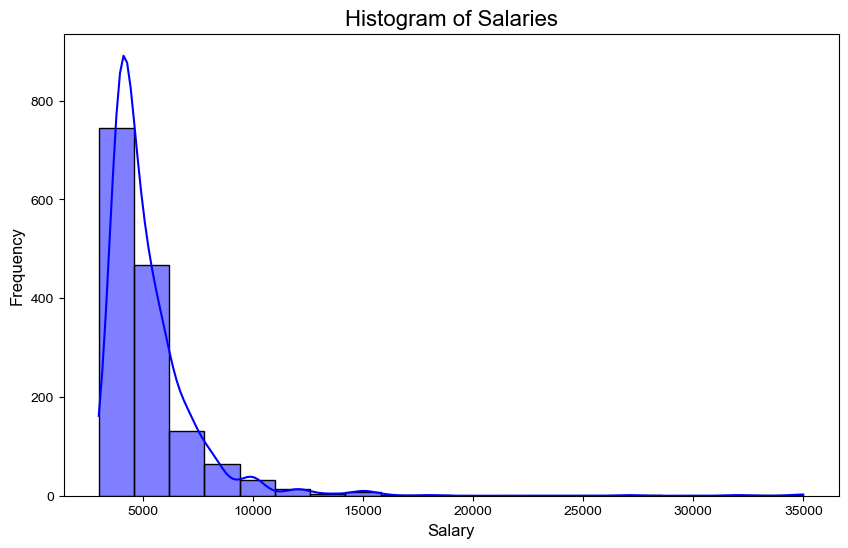

In [1265]:
# Plot a histogram of the salary column
plt.figure(figsize=(10, 6))
sns.histplot(Jadarat_data['salary'], kde=True, bins=20, color='blue')

# Add titles and labels
plt.title('Histogram of Salaries', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [1266]:
Jadarat_data['salary'].max()

35000.0

In [1267]:
Jadarat_data['salary'].min()

3000.0

In [1268]:
Jadarat_data['salary'].median()

4500.0

In [1269]:
Jadarat_data['salary'].mean()

5293.489448604493

In [1270]:
Jadarat_data[Jadarat_data['salary'] == 15000]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,positions,job_post_id,exper,gender,salary,تأمين طبي,عمولات,خصومات,بدل مواصلات,حوافز,إجازة سنوية,إجازة يومين,job_year,standardized_eco_activity,level_experience
170,مهندس نظم تقنية معلومات,22/04/1444,['متابعة وتقييم عملية جمع المعطيات ومتطلبات نظ...,[' إجراء الابحاث والدراسات اللازمة لتطوير بي...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,No Qualification,الرياض,ABA ASLAB...,دوام كامل,0 / 1,20202026273632,7 Years,both,15000.0,False,False,False,False,False,False,False,2022,التسجيل لتقديم خدمات الحوسبة السحابية,خبير
174,فني شبكات تقنية معلومات,22/04/1444,['تقديم الدعم والمساعدة الفنية للموظفين والعمل...,[' تقديم الدعم والمساعدة الفنية للموظفين وال...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,"['Language data', 'الانجليزية', 'محترف']",الرياض,ABA ASLAB...,دوام كامل,0 / 1,20202026273598,7 Years,both,15000.0,False,False,False,False,False,False,False,2022,التسجيل لتقديم خدمات الحوسبة السحابية,خبير
229,مدير مكتب,20/04/1444,['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...,[' إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...,مكتب محمد طه عبدالقادر السقاف للاستشارات الهندسية,13-2004606,خاص,صغيرة فئة ب,الاستشارات الهندسية للتخطيط الحضري,"['Language data', 'العربية', 'محترف', 'الانجلي...",مكة المكرمة,MAKKAH AL...,دوام كامل,0 / 1,20202026270424,12 Years,both,15000.0,False,False,False,False,False,False,False,2022,الاستشارات الهندسية,خبير
559,مدير تسويق,05/05/1444,['المشاركة في وضع الأهداف والسياسات والخطط الت...,[' المشاركة في وضع الأهداف والسياسات والمباد...,شركة روافد الحقول للوجبات السريعة شركة شخص واحد,9-2075281,خاص,صغيرة فئة ب,المطاعم مع الخدمة,No Qualification,مكة المكرمة,JEDDAH...,دوام كامل,0 / 1,20202026313724,4 Years,both,15000.0,False,False,False,False,False,False,False,2022,المطاعم مع الخدمة,متوسط
749,رئيس تنفيذي,19/05/1444,['المشاركة في وضع الأهداف والخطط الإستراتيجية ...,[' المشاركة في وضع الإستراتيجية العامة وتحقي...,مؤسسة لحظات القهوة لتقديم المشروبات,13-1978270,خاص,صغيرة فئة ب,محلات تقديم المشروبات ( الكوفي شوب ),"['Skill data', 'تطوير نشاط المؤسسة', 'محترف', ...",مكة المكرمة,MAKKAH AL...,دوام كامل,0 / 1,20202026338994,10 Years,both,15000.0,False,False,False,False,False,False,False,2022,أنشطة المطاعم,خبير
841,مهندس مدني,26/05/1444,[' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...,[' فهم مبادئ إدارة المشاريع والبرامج ،مهارات ت...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,No Qualification,حائل,HAIL...,دوام كامل,0 / 1,20202026349401,10 Years,M,15000.0,False,False,False,False,False,False,False,2022,إدارة المشاريع,خبير
1239,مهندس معماري,15/06/1444,['تصميم المباني الجديدة أو الملحقات أو التعديل...,[' وضع التصاميم لمشاريع الإنشاءات وإدارة فري...,شركة المساحون العرب نصر أحمد اسحاق الحسيني للا...,1-155268,خاص,صغيرة فئة ب,إستشارات الهندسة الالكترونية,"['Skill data', 'التصميم', 'متوسط', 'Language d...",الرياض,AR RIYADH...,دوام كامل,0 / 1,20202026395337,7 Years,both,15000.0,False,False,False,False,False,False,False,2023,إستشارات الهندسة الالكترونية,خبير


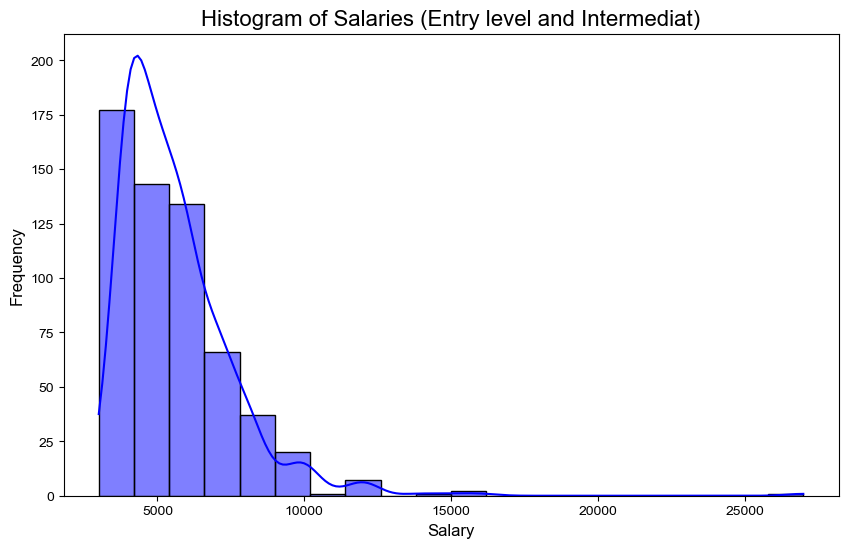

In [1271]:
# Filter the DataFrame for 'مبتدئ' and 'متوسط' in the level_experience column
filtered_data = Jadarat_data[Jadarat_data['level_experience'].isin(['مبتدئ', 'متوسط'])]

# Plot a histogram of the salary column for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['salary'], kde=True, bins=20, color='blue')

# Add titles and labels
plt.title('Histogram of Salaries (Entry level and Intermediat)', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

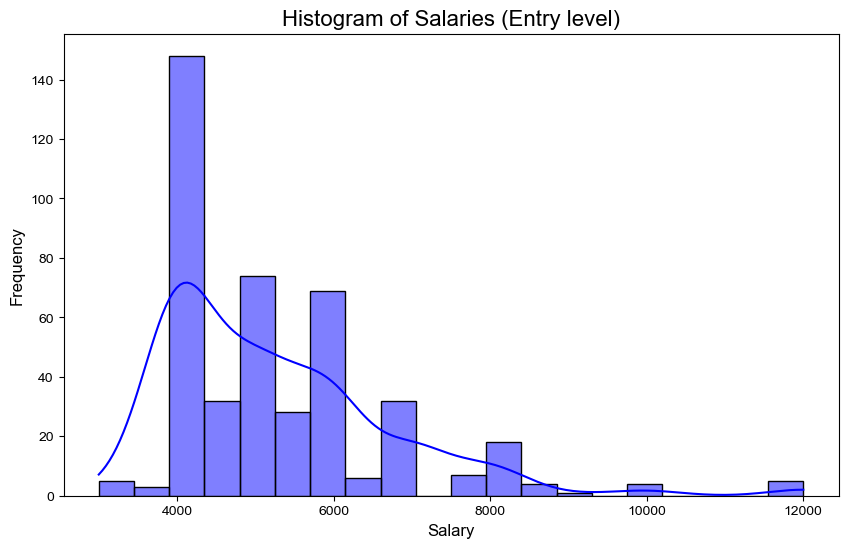

In [1272]:
# Filter the DataFrame for 'مبتدئ' in the level_experience column
filtered_data = Jadarat_data[Jadarat_data['level_experience'].isin(['مبتدئ'])]

# Plot a histogram of the salary column for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['salary'], kde=True, bins=20, color='blue')

# Add titles and labels
plt.title('Histogram of Salaries (Entry level)', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [1273]:
filtered_data[filtered_data['salary'] >10000]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,positions,job_post_id,exper,gender,salary,تأمين طبي,عمولات,خصومات,بدل مواصلات,حوافز,إجازة سنوية,إجازة يومين,job_year,standardized_eco_activity,level_experience
481,مصمم جرافيك,29/03/1444,['تطوير الأفكار الإبداعية والمفاهيم لتوصيل الر...,[' التنسيق مع مالك التصميم (عملاء محليون أو ...,مؤسسة عبدالعزيز محمد ابراهيم العجمي التجارية,15-1971648,خاص,صغيرة فئة أ,البيع بالتجزئة للكماليات وللإكسسوارات الملابس،...,"['Skill data', 'اتقان في البرامج التصميم ', '...",المنطقة الشرقية,AL KHUBAR...,دوام كامل,0 / 2,20202026229765,2 Years,both,12000.0,False,False,False,False,False,False,False,2022,البيع بالتجزئة للكماليات وللإكسسوارات الملابس،,مبتدئ
1087,أخصائي مختبرات طبية,10/06/1444,['تحديد احتياجات المختبر من المواد الأولية الل...,[' تحديد احتياجات المختبر من المواد الطبية و...,شركة النور السامي الطبي العام,35-2320,خاص,متوسطة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,No Qualification,مكة المكرمة,NUMARAH...,دوام كامل,0 / 2,20202026391958,2 Years,both,12000.0,False,False,False,False,False,False,False,2023,الخدمات الطبية,مبتدئ
1090,أخصائي مختبرات طبية,10/06/1444,['تحديد احتياجات المختبر من المواد الأولية الل...,[' تحديد احتياجات المختبر من المواد الطبية و...,شركة سعيد علي الغامدي الطبي العام,20-2184,خاص,متوسطة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,No Qualification,الباحة,AL MUKHWA...,دوام كامل,0 / 2,20202026391929,2 Years,both,12000.0,False,False,False,False,False,False,False,2023,الخدمات الطبية,مبتدئ
1091,أخصائي مختبرات طبية,10/06/1444,['تحديد احتياجات المختبر من المواد الأولية الل...,[' تحديد احتياجات المختبر من المواد الطبية و...,شركة سعيد علي الغامدي الطبي العام,20-2184,خاص,متوسطة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,No Qualification,الباحة,AL MUKHWA...,دوام كامل,0 / 2,20202026391922,2 Years,both,12000.0,False,False,False,False,False,False,False,2023,الخدمات الطبية,مبتدئ
1094,أخصائي مختبرات طبية,10/06/1444,['تحديد احتياجات المختبر من المواد الأولية الل...,[' تحديد احتياجات المختبر من المواد الطبية و...,شركة الرافق الطبي,20-2185,خاص,متوسطة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,"['Language data', 'الانجليزية', 'متوسط', 'Prof...",الباحة,QILWAH...,دوام كامل,0 / 2,20202026391885,2 Years,both,12000.0,False,False,False,False,False,False,False,2023,الخدمات الطبية,مبتدئ


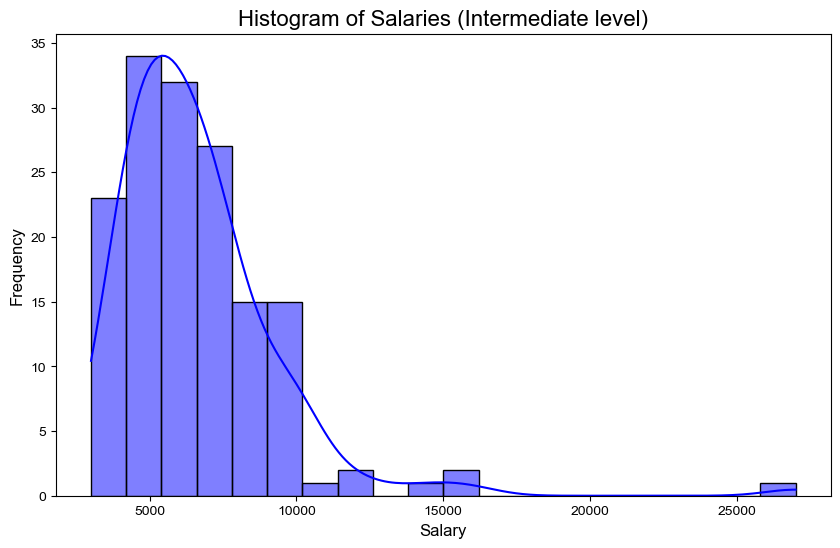

In [1274]:
# Filter the DataFrame for 'مبتدئ' in the level_experience column
filtered_data = Jadarat_data[Jadarat_data['level_experience'].isin(['متوسط'])]

# Plot a histogram of the salary column for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['salary'], kde=True, bins=20, color='blue')

# Add titles and labels
plt.title('Histogram of Salaries (Intermediate level)', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [1275]:
filtered_data[filtered_data['salary'] >14000]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,positions,job_post_id,exper,gender,salary,تأمين طبي,عمولات,خصومات,بدل مواصلات,حوافز,إجازة سنوية,إجازة يومين,job_year,standardized_eco_activity,level_experience
171,مدير برمجيات,22/04/1444,['المشاركة في تخطيط استراتيجية وأنشطة تطوير ال...,[' إنشاء برامج تطوير البرامج وفقاً لاستراتيج...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,No Qualification,الرياض,ABA ASLAB...,دوام كامل,0 / 1,20202026273626,4 Years,both,16000.0,False,False,False,False,False,False,False,2022,التسجيل لتقديم خدمات الحوسبة السحابية,متوسط
470,مدير عمليات موارد بشرية,01/04/1444,['المشاركة في وضع الأهداف الرئيسية وخطط وبرامج...,[' المشاركة في تطوير الأهداف الرئيسية لإدارة...,شركة ال جي شاكر المحدوده,1-180211,خاص,متوسطة فئة ج,صناعة أجهزة تكييف الهواء (وحدات أو مركزي ) فريون,"['Language data', 'انجليزية', 'محترف', 'Profes...",الرياض,ABA ASLAB...,دوام كامل,0 / 1,20202026231523,4 Years,both,27000.0,False,False,False,False,False,False,False,2022,صناعة أجهزة تكييف الهواء فريون,متوسط
559,مدير تسويق,05/05/1444,['المشاركة في وضع الأهداف والسياسات والخطط الت...,[' المشاركة في وضع الأهداف والسياسات والمباد...,شركة روافد الحقول للوجبات السريعة شركة شخص واحد,9-2075281,خاص,صغيرة فئة ب,المطاعم مع الخدمة,No Qualification,مكة المكرمة,JEDDAH...,دوام كامل,0 / 1,20202026313724,4 Years,both,15000.0,False,False,False,False,False,False,False,2022,المطاعم مع الخدمة,متوسط


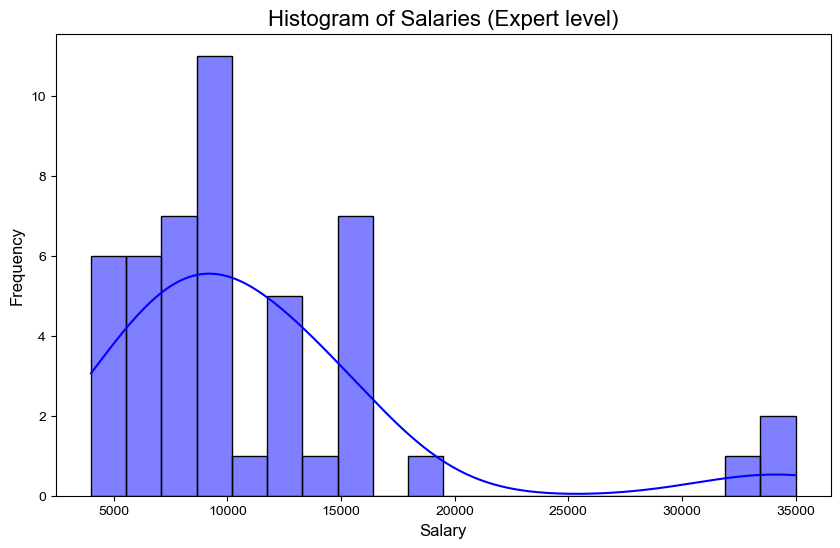

In [1276]:
# Filter the DataFrame for 'مبتدئ' in the level_experience column
filtered_data = Jadarat_data[Jadarat_data['level_experience'].isin(['خبير'])]

# Plot a histogram of the salary column for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['salary'], kde=True, bins=20, color='blue')

# Add titles and labels
plt.title('Histogram of Salaries (Expert level)', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [1277]:
filtered_data[filtered_data['salary']>30000]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,positions,job_post_id,exper,gender,salary,تأمين طبي,عمولات,خصومات,بدل مواصلات,حوافز,إجازة سنوية,إجازة يومين,job_year,standardized_eco_activity,level_experience
530,مدير عمليات موارد بشرية,06/05/1444,['المشاركة في وضع الأهداف الرئيسية وخطط وبرامج...,[' المشاركة في تطوير الأهداف الرئيسية لإدارة...,شركة انكر اليابان,1-391480,خاص,صغيرة فئة ب,خدمات المكاتب العلمية والفنية للمنتجات عدا الم...,"['Language data', 'الانجليزية', 'محترف', 'Prof...",الرياض,AR RIYADH...,دوام كامل,0 / 1,20202026314815,7 Years,both,32000.0,False,False,False,False,False,False,False,2022,خدمات المكاتب العلمية والفنية للمنتجات عدا الم...,خبير
888,طيار جناح ثابت,Publish date,['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...,[' دراسة بيانات الرحلة ومخططها والتحقق من ال...,شركة طيران اديل,9-1432020,خاص,كبيرة,النقل الجوي للبضائع المحدد بمواعيد,"['Language data', 'الانجليزي ', 'محترف', 'Prof...",مكة المكرمة,JEDDAH...,دوام كامل,0 / 50,20202026377730,10 Years,both,35000.0,False,False,False,False,False,False,False,0,النقل الجوي للبضائع المحدد بمواعيد,خبير
1132,طيار جناح ثابت,07/06/1444,['تدقيق بيانات الرحلة وخطة الطيران، وتفقد وتجه...,[' دراسة بيانات الرحلة ومخططها والتحقق من ال...,شركة طيران اديل,9-1432020,خاص,كبيرة,النقل الجوي للبضائع المحدد بمواعيد,"['Language data', 'الانجليزي ', 'محترف', 'Prof...",مكة المكرمة,JEDDAH...,دوام كامل,0 / 50,20202026377730,10 Years,both,35000.0,False,False,False,False,False,False,False,2022,النقل الجوي للبضائع المحدد بمواعيد,خبير


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

# problem statment

###  What proportion of job postings is attributed to each region within the kingdom?

In [1281]:
Jadarat_data['region'].value_counts()

region
الرياض             621
مكة المكرمة        369
المنطقة الشرقية    219
المدينة المنورة     86
الباحة              46
عسير                42
القصيم              32
حائل                18
تبوك                11
نجران                8
جازان                7
الجوف                5
الحدود الشمالية      4
اخرى                 1
Name: count, dtype: int64

In [1282]:
total_jobe = Jadarat_data.shape[0]

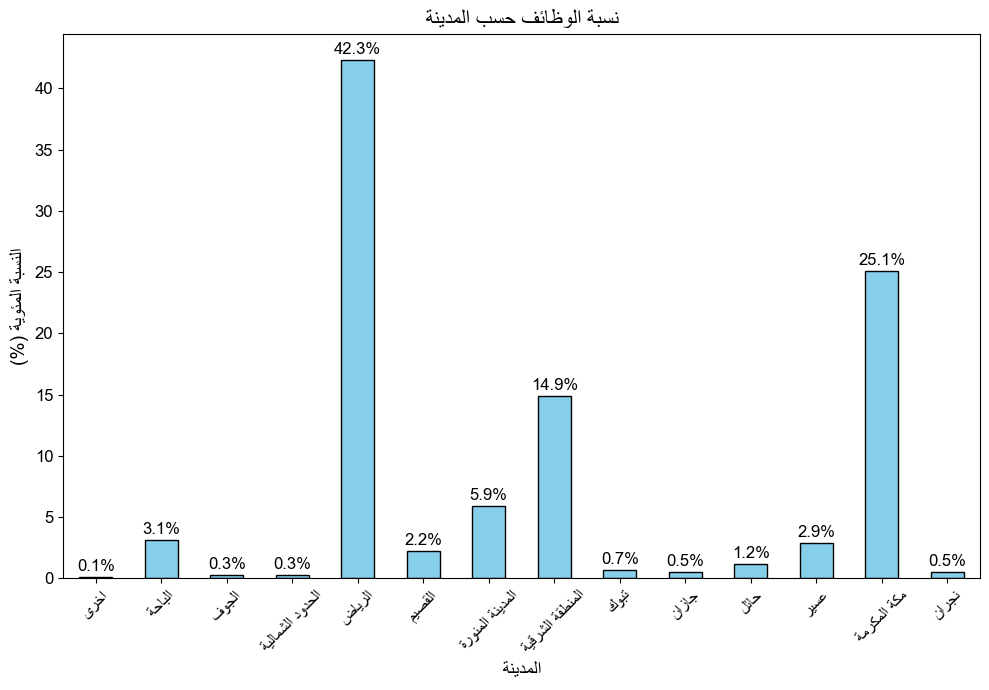

In [1283]:
import arabic_reshaper
from bidi.algorithm import get_display

# Assuming `region_proportions` is already calculated (with English region names)
region_proportions = round(((Jadarat_data.groupby('region').size()) / total_jobe) * 100, 1)

# Dynamically reshape and reverse the region names (assuming they are in Arabic or need to be processed)
reshaped_regions = [arabic_reshaper.reshape(region) for region in region_proportions.index]
bidi_regions = [get_display(region) for region in reshaped_regions]

# Update the index of the region_proportions to use the reshaped Arabic names
region_proportions.index = bidi_regions

# Create the bar chart
plt.figure(figsize=(10, 7))
region_proportions.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title (Arabic reshaped and reversed for correct display)
plt.title(get_display(arabic_reshaper.reshape("نسبة الوظائف حسب المدينة")), fontsize=16)
plt.xlabel(get_display(arabic_reshaper.reshape("المدينة")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("النسبة المئوية (%)")), fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)

# Display the values on top of the bars
for index, value in enumerate(region_proportions):
    plt.text(index, value + 0.5, f"{value}%", ha='center', fontsize=12)

# Show the chart
plt.tight_layout()

plt.show()

### Is there a gender preference indicated in the job postings?

In [1285]:
gender_counts =Jadarat_data['gender'].value_counts()

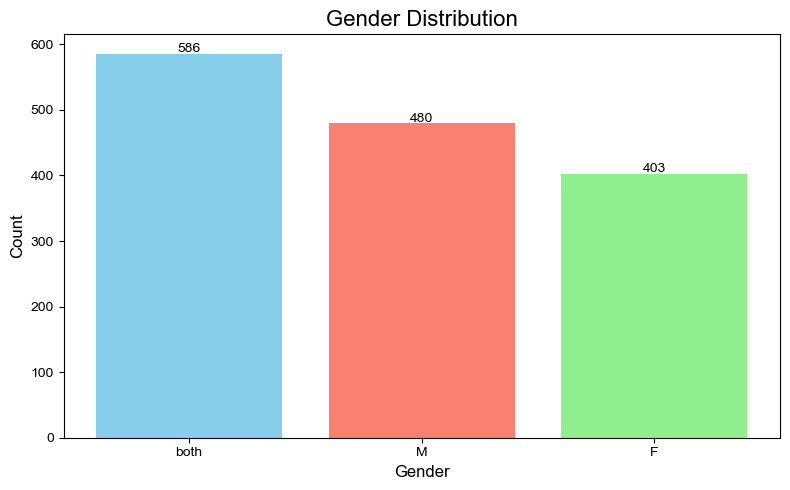

In [1286]:
# Convert Series to lists
labels = gender_counts.index.tolist()  # Gender categories
counts = gender_counts.values.tolist()  # Counts

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=["skyblue", "salmon", "lightgreen"])
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding value labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 2, str(count), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

- The slight preference for males over females in job postings (difference of 77).
- The fact that most job postings target both genders (587 postings)

### What is the expected salary range for fresh graduates?

In [1290]:
fresh_graduates =Jadarat_data[Jadarat_data['level_experience'] == 'خريج']
print(f' The range for fresh graduates is from {int(fresh_graduates['salary'].min()):,} to {int(fresh_graduates['salary'].max()):,} SR')


 The range for fresh graduates is from 3,000 to 12,325 SR


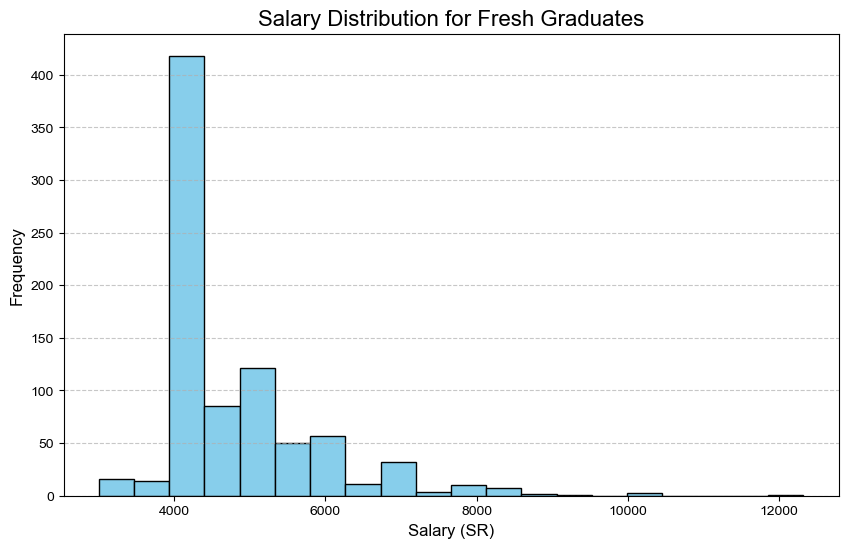

In [1291]:
# Plot salary distribution
plt.figure(figsize=(10, 6))
plt.hist(fresh_graduates['salary'], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Salary Distribution for Fresh Graduates', fontsize=16)
plt.xlabel('Salary (SR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

### Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

In [1293]:
level_experience = Jadarat_data['level_experience'].value_counts()

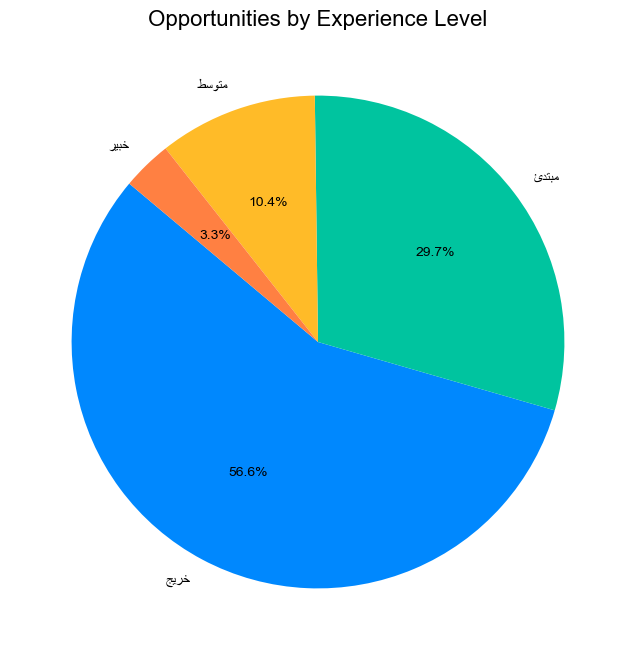

In [1294]:
from matplotlib import rcParams

# Configure Matplotlib to use a font that supports Arabic
rcParams['font.family'] = 'Arial'  # Replace 'Arial' with any Arabic-supported font available on your system


reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in level_experience.keys()]
# Plot
plt.figure(figsize=(8, 8))

colors = ["#0088FE", "#00C49F", "#FFBB28", "#FF8042"]
plt.pie(level_experience.values, 
        labels=reshaped_labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)

plt.title("Opportunities by Experience Level", fontsize=16)
plt.show()

The data shows that fresh graduates (خريج) have the highest number of opportunities (833),
which is significantly greater than any other experience level.
This indicate that there are more opportunities avaliable for fresh graduates compared to beginners, intermediates, or experts

### How many companies are there in jadarate paltform based on their type and size?

In [1297]:
filter = Jadarat_data[Jadarat_data['comp_size'] != 'Unknown']

In [1298]:
filter.groupby(['comp_type','comp_size']).size()

comp_type   comp_size   
خاص         صغيرة فئة أ     325
            صغيرة فئة ب     634
            عملاقة           46
            كبيرة            73
            متوسطة فئة أ    162
            متوسطة فئة ب    134
            متوسطة فئة ج     76
شبه حكومية  كبيرة             5
dtype: int64

### How many companies and entities advertised job vacancies in jadarate paltform?

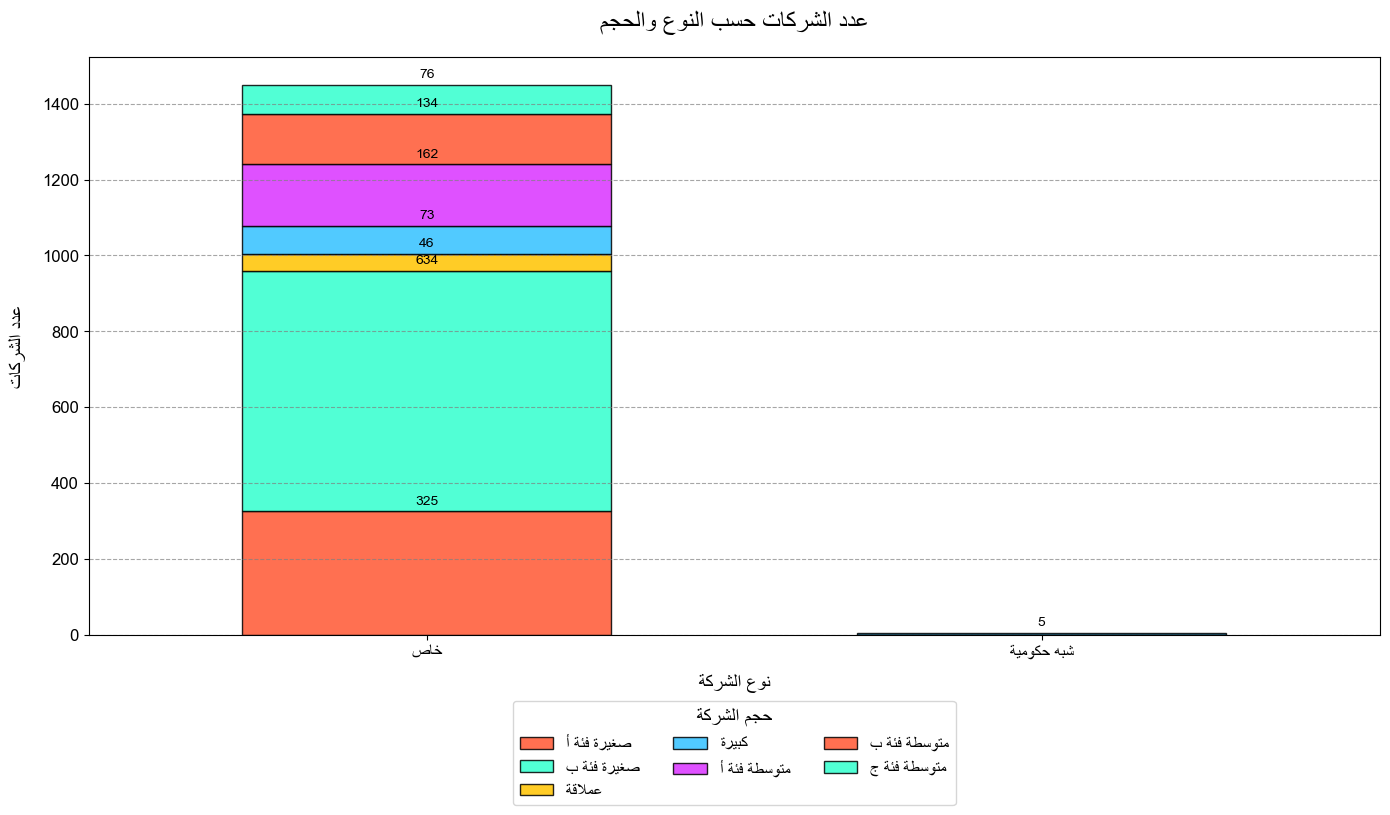

In [1300]:
# Grouping by 'comp_type' and 'comp_size'
grouped_data = filter.groupby(['comp_type', 'comp_size']).size().unstack(fill_value=0)

# Reshape Arabic text for proper display
reshaped_columns = [get_display(arabic_reshaper.reshape(col)) for col in grouped_data.columns]
reshaped_index = [get_display(arabic_reshaper.reshape(idx)) for idx in grouped_data.index]

# Update the column and index labels with reshaped Arabic text
grouped_data.columns = reshaped_columns
grouped_data.index = reshaped_index

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#FF5733', '#33FFCE', '#FFC300', '#33C1FF', '#DA33FF']
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black', alpha=0.85, width=0.6)

# Add title and axis labels
plt.title(get_display(arabic_reshaper.reshape('عدد الشركات حسب النوع والحجم')), fontsize=18, pad=20)
plt.xlabel(get_display(arabic_reshaper.reshape('نوع الشركة')), fontsize=14, labelpad=10)
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الشركات')), fontsize=14, labelpad=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

# Customize x-axis labels
plt.xticks(fontsize=12, rotation=0, ha='center')
plt.yticks(fontsize=12)

# Annotate the bars with values
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height + 10,  # Position above the bar
                f'{int(height):,}', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black'
            )

# Customize legend
plt.legend(
    title=get_display(arabic_reshaper.reshape('حجم الشركة')),
    fontsize=12,
    title_fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),  # Move legend below the chart
    ncol=3  # Arrange legend items in multiple columns
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase space at the bottom for the legend
plt.show()